# __Which features of a given flight will predict a late arrival?__ 

The dataset was obtained from https://www.kaggle.com/usdot/flight-delays, and comprised of all US domestic flights in 2015. This notebook will reflect the process of reviewing the dataset/EDA and selecting the relevant features, and then select, fit, and tune a model. 


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/flights.csv')

df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


**Initial Review of Dataset & Limitations of the Model:** The data has 5,819,079 rows and 31 columns. The data includes columns for departure year, month, day, and time (0100-2359).  The average arrival delay across the dataset is only 4 minutes. 

The model will **not** include analysis based upon day, since these features are less flexible. However, we will convert departure time to categorical three-hour intervals. The other features will include month, day of the week, scheduled departure, airline, origin airport, destination airport, airtime, scheduled arrival time, and distance. The model will not address day of the month or the reason for the delay (which is specified in the data set). These and other columns will be dropped before further EDA. 

The target will be arrival delay, converted to a binary on-time/late, based upon a specific cut-off specified below. 

In [5]:
df2 = df.drop(['YEAR', 'DAY', 'TAIL_NUMBER', 'FLIGHT_NUMBER', 'DEPARTURE_TIME', 
               'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 
               'ELAPSED_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 
               'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON'], axis = 1)

In [6]:
df2.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,4,AS,ANC,SEA,5,169.0,1448,430,-22.0
1,1,4,AA,LAX,PBI,10,263.0,2330,750,-9.0
2,1,4,US,SFO,CLT,20,266.0,2296,806,5.0
3,1,4,AA,LAX,MIA,20,258.0,2342,805,-9.0
4,1,4,AS,SEA,ANC,25,199.0,1448,320,-21.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 444.0+ MB


In [8]:
#Change objects to strings:

df2.AIRLINE = df.AIRLINE.astype('str')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 444.0+ MB


In [10]:
df2.isna().any()

MONTH                  False
DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
AIR_TIME                True
DISTANCE               False
SCHEDULED_ARRIVAL      False
ARRIVAL_DELAY           True
dtype: bool

**Initial Review:** Month ranges from 1-12, Day of Week ranges from 1-7, and Scheduled Departure and Scheduled Arrival both range from 0100-1259 (all expected and make sense). Air Time averages 113 minutes, with a high max (690 minutes, or 11.5 hours); some research reveals this is expected (Boston to Hawaii).  

More significantly, Arrival_Delay and Air_Time have significantly fewer rows than the full dataset (5.714 million compared to 5.819 million, or 1.8% fewer). This is explored below: 

In [11]:
diff = df2.MONTH.count() - df2.AIR_TIME.count()
can = len(df[df.CANCELLED == 1])
div = len(df[df.DIVERTED == 1])
comb = can + div

print("""Columns Arrival_Delay and Air_Time both have {diff} fewer entries than the 
other columns. This is likely a combination of cancellations (n={can}) and 
diverted flights (n={div}).  The combined total ({comb}) equals the offset.  
Accordingly, we will drop any rows with NaNs in Air_Time and Arrival_Delay:""".format(
    diff=diff, 
    can=can, 
    div=div, 
    comb=comb))

Columns Arrival_Delay and Air_Time both have 105071 fewer entries than the 
other columns. This is likely a combination of cancellations (n=89884) and 
diverted flights (n=15187).  The combined total (105071) equals the offset.  
Accordingly, we will drop any rows with NaNs in Air_Time and Arrival_Delay:


In [12]:
df3 = df2.dropna(axis=0)
df3.isna().any()

MONTH                  False
DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
AIR_TIME               False
DISTANCE               False
SCHEDULED_ARRIVAL      False
ARRIVAL_DELAY          False
dtype: bool

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 479.5+ MB


**Making the Departure Times Categorical:** Leaving the departure times as continuous will cause the model to select a threshold departure time. We would rather have it treat different departure thresholds as individual predictors, as separate categories, in eight, three-hour increments (i.e., 00:00-02:59, 03:00-05:59, etc.).  This is done below, with each three-hour period beginning at the referenced hour.

In [14]:
for i in range (0,8):
    df3.loc[(df['SCHEDULED_DEPARTURE'] >= (i*300)) & 
            (df['SCHEDULED_DEPARTURE'] < ((i+1)*300)), 
            'SCHEDULED_DEPARTURE'] = i*3

In [15]:
df3.shape

(5714008, 10)

Preprocessing looks good.  We'll move on to setting up the target.

### INPUT "LATE" THRESHOLD in MINUTES:

The model will use a threshold for a flight being considered "late", 
between 0 and 60 minutes (default is 0 minutes; __all discussion below is based upon a zero-minutes-late threshold__).  

In [16]:
while True:
    try:
        threshold = int(input("Enter the late threshold (minutes 0-60):"))
        break
    except ValueError: 
        threshold = 0
if threshold > 60:
    threshold = 60
if threshold < 0:
    threshold = 0
print("\nThe model will use a threshold of",threshold,"minutes.")

Enter the late threshold (minutes 0-60):
Enter the late threshold (minutes 0-60):0

The model will use a threshold of 0 minutes.


In [18]:
#convert the target into a binary for on-time/late based upon the "threshold" value
df3.loc[df['ARRIVAL_DELAY'] <= threshold, 'ARRIVAL_DELAY'] = 0
df3.loc[df['ARRIVAL_DELAY'] > threshold, 'ARRIVAL_DELAY'] = 1
df3.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,4,AS,ANC,SEA,0,169.0,1448,430,0.0
1,1,4,AA,LAX,PBI,0,263.0,2330,750,0.0
2,1,4,US,SFO,CLT,0,266.0,2296,806,1.0
3,1,4,AA,LAX,MIA,0,258.0,2342,805,0.0
4,1,4,AS,SEA,ANC,0,199.0,1448,320,0.0


### Further Exploration:

In [19]:
df3.AIRLINE.value_counts(normalize = True)

WN    0.217431
DL    0.152306
AA    0.124770
OO    0.100947
EV    0.097086
UA    0.088863
MQ    0.048791
B6    0.045860
US    0.033991
AS    0.030003
NK    0.020160
F9    0.015767
HA    0.013308
VX    0.010719
Name: AIRLINE, dtype: float64

__Analysis:__  Eight airlines constitute less than 5% of the total flights each, but nearly 22% of the total flights. The lowest five combined constitute 9% of the total. It may probably make more sense to drop the rows with the five least-frequently used airlines, purely to simplify the model (AS (Alaska Airlines), NK (Spirit Airlines), F9 (Frontier Airlines), HA (Hawaiian Airlines), and VX (Virgin America)). However, these airlines are/were significant players with regard to answering the question posed. It may make sense to simplify the model via dropping airports instead; this is explored below: 

In [20]:
# Review frquency of origin airports 
df3.ORIGIN_AIRPORT.value_counts(normalize = True)

ATL      6.011647e-02
ORD      4.839930e-02
DFW      4.071520e-02
DEN      3.384699e-02
LAX      3.360216e-02
             ...     
15497    1.750085e-07
14222    1.750085e-07
13502    1.750085e-07
14025    1.750085e-07
11503    1.750085e-07
Name: ORIGIN_AIRPORT, Length: 929, dtype: float64

In [21]:
# Explore potential cut-offs for including origin airports

for i in range(0,201,25):
    total = df3.ORIGIN_AIRPORT.value_counts()>i
    num = total.value_counts()
    print ('Number of airports with more than',i,'flights:',num[1])

Number of airports with more than 0 flights: 929
Number of airports with more than 25 flights: 731
Number of airports with more than 50 flights: 675
Number of airports with more than 75 flights: 621
Number of airports with more than 100 flights: 587
Number of airports with more than 125 flights: 563
Number of airports with more than 150 flights: 546
Number of airports with more than 175 flights: 533
Number of airports with more than 200 flights: 514


__Analysis:__ The most popular origin airport (Atlanta) has 6% of all originating flights, while the fifth most popular (Los Angeles) has 3.4%.  There are 929 origin airports total, many with the less frequent ones constituting .000000175 (or 1 flight each). 

Airports are categorized by the FAA into "Primary" and "Non-Primary," a component of the later including Non-Primary Commercial Service. The Primary and Non-Primary Commercial Service in 2015 total 514 airports.*  Coincidentally, this is the same number of aiports in the dataset with more than 200 flights per day. However, in 2012, 99.8% of "enplanements" took place at the Primary airports (n = 389).  

We created a list of the primary airports, and will select all rows from the dataset including airports in the list. 

\* https://www.faa.gov/airports/planning_capacity/npias/reports/historical/media/2015/npias-2015-2019-report-narrative.pdf

In [22]:
primary_airports = ['BHM','DHN','HSV','MOB','MGM','MRI','ANC','ANI','BRW','BET','CDV','SCC','DLG','FAI','GAL','HOM',
                    'JNU','ENA','KTN','AKN','ADQ','OTZ','OME','PSG','SIT','KSM','UNK','DUT','VDZ','WRG','YAK','IFP',
                    'FLG','GCN','AZA','PGA','GCW','PHX','TUS','YUM','XNA','FSM','LIT','TXK','ACV','BFL','BUR','FAT',
                    'LGB','LAX','MMH','MRY','OAK','ONT','SNA','PSP','RDD','SMF','SAN','SFO','SJC','SBP','SBA','SMX',
                    'STS','SCK','ASE','COS','DEN','DRO','EGE','GJT','GUC','HDN','MTJ','BDL','HVN','ILG','DAB','FLL',
                    'RSW','VPS','GNV','JAX','EYW','MLB','MIA','MCO','ECP','PNS','PGD','SFB','SRQ','UST','PIE','TLH',
                    'TPA','PBI','ABY','ATL','AGS','BQK','CSG','SAV','VLD','ITO','HNL','OGG','KOA','MKK','LNY','LIH',
                    'BOI','IDA','LWS','PIH','SUN','TWF','BLV','BMI','CMI','ORD','MDW','MWA','MLI','PIA','UIN','RFD',
                    'SPI','EVV','FWA','IND','SBN','CID','DSM','DBQ','SUX','ALO','GCK','MHK','FOE','ICT','CVG','LEX',
                    'SDF','OWB','PAH','AEX','BTR','LFT','LCH','MLU','MSY','SHV','BGR','PWM','PQI','RKD','BWI','HGR',
                    'SBY','BOS','HYA','ACK','PVC','MVY','ORH','BJI','BRD','DLH','HIB','INL','MSP','RST','STC','GTR',
                    'GPT','JAN','COU','JLN','MCI','SGF','STL','BIL','BZN','BTM','GTF','HLN','FCA','MSO','SDY','GRI',
                    'LNK','OMA','BLD','EKO','LAS','VGT','RNO','LEB','MHT','PSM','ACY','TTN','EWR','ABQ','HOB','ROW',
                    'SAF','ALB','BGM','BUF','ELM','FRG','ISP','ITH','JFK','LGA','SWF','IAG','PBG','ROC','SYR','ART',
                    'HPN','AVL','CLT','USA','FAY','GSO','PGV','OAJ','EWN','RDU','ILM','BIS','DIK','FAR','GFK','MOT',
                    'XWA','DVL','JMS','CAK','LUK','CLE','CMH','LCK','DAY','TOL','YNG','LAW','OKC','TUL','EUG','MFR',
                    'OTH','PDX','RDM','ABE','ERI','MDT','LBE','PHL','PIT','SCE','AVP','IPT','BID','PVD','WST','CHS',
                    'CAE','FLO','GSP','HHH','MYR','ABR','RAP','FSD','CHA','TYS','MEM','BNA','TRI','ABI','AMA','AUS',
                    'BPT','BRO','CLL','CRP','DAL','DFW','ELP','HRL','IAH','HOU','GRK','LRD','GGG','LBB','MFE','MAF',
                    'SJT','SAT','TYR','ACT','SPS','CDC','OGD','PVU','SLC','SGU','BTV','CHO','LYH','PHF','ORF','RIC',
                    'ROA','DCA','IAD','BLI','FRD','PSC','PUW','BFI','SEA','GEG','ALW','EAT','YKM','CRW','CKB','HTS',
                    'MGW','ATW','EAU','GRB','LSE','MSN','MKE','CWA','RHI','CPR','COD','GCC','JAC','LAR','RKS','APN',
                    'DTW','ESC','FNT','GRR','CMX','IMT','AZO','LAN','MQT','MKG','PLN','MBS','CIU','TVC','PPG','GUM',
                    'SPN','ROP','TIQ','BQN','NRR','CPX','PSE','SJU','SIG','VQS','STT','STX','IATA']

In [23]:
# Limit DF to include only those aiports in the primary_airpots list
df4 = df3.loc[df3['ORIGIN_AIRPORT'].isin(primary_airports)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5224812 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 438.5+ MB


In [24]:
print("""Results:\nReduction in rows from {indf3} to {indf4}; 
Reduction in Origin Airports from {all} to {primary}""".format(indf3 = len(df3.index), indf4 = len(df4.index), 
                                                              all = df3.ORIGIN_AIRPORT.nunique(),
                                                              primary = df4.ORIGIN_AIRPORT.nunique()))

Results:
Reduction in rows from 5714008 to 5224812; 
Reduction in Origin Airports from 929 to 310


## __Further Reduction is Required__

After one-hot encoding and attempting to fit the classifier, the Colab notebook crashed ... even after upgrading the available RAM.  Accordingly, we will significantly reduce the size of the dataset in a few different ways.  
* First, we'll reduce the time frame from January to June.  This will remove the holiday travel effect, hopefully so that a given day of the week is not biased (such as Wednesday getting undue attention simply because of the Wednesday before Thanksgiving).  
* Second, we'll reduce the destination airports to the same list used in the Origin Airport feature. 
* Finally, if necessary, we'll look at reducing the airline list. 

In [25]:
# Limit the time frame to MONTH 1-6:
months = [1,2,3,4,5,6]
df5 = df4.loc[df4['MONTH'].isin(months)]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814446 entries, 0 to 2889511
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 236.2+ MB


__Results:__ Noted that the memory usage has dropped from 438.5 MB to 236.2 MB.  

In [26]:
# Limit destination airports to only those in the primary_airports list:
df6 = df5.loc[df5['DESTINATION_AIRPORT'].isin(primary_airports)]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810801 entries, 0 to 2889511
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY_OF_WEEK          int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_DEPARTURE  int64  
 6   AIR_TIME             float64
 7   DISTANCE             int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(5), object(3)
memory usage: 235.9+ MB


In [27]:
print("""Results:\nReduction in rows from {indf5} to {indf6}; 
Reduction in Origin Airports from {d_all} to {d_primary}""".format(indf5 = len(df5.index), indf6 = len(df6.index), 
                                                              d_all = df5.DESTINATION_AIRPORT.nunique(),
                                                              d_primary = df6.DESTINATION_AIRPORT.nunique()))

Results:
Reduction in rows from 2814446 to 2810801; 
Reduction in Origin Airports from 321 to 310


__Analysis:__ Noted relatively minor reduction in rows after limiting the destination airports, but a significant reduction in the memory usage from 438 MB to 236 MB.  

## __Train-Test Split__ / __One-Hot Encoding__

In [28]:
y = df6.ARRIVAL_DELAY
X = df6.drop(columns = ['ARRIVAL_DELAY'])
y

0          0.0
1          0.0
2          1.0
3          0.0
4          0.0
          ... 
2889507    0.0
2889508    1.0
2889509    1.0
2889510    1.0
2889511    0.0
Name: ARRIVAL_DELAY, Length: 2810801, dtype: float64

In [29]:
ohX = pd.get_dummies(X)

In [30]:
ohX.shape

(2810801, 640)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(ohX,y,random_state = 42, test_size = 0.25)

## __Fit and Review a Decision Tree Classifier__

In [82]:
tree_clf = DecisionTreeClassifier(max_depth = 5, criterion='gini')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### __Initial Review of Model Results__:

First, we reviewed the efficacy of the initial model (before tuning it further).  Then, we looked at the feature importances from the tree. 

In [83]:
pred = tree_clf.predict(X_test)

In [84]:
# Confusion matrix and classification report
import seaborn as sns
cm = confusion_matrix(y_test, pred, normalize='true')
cm

array([[0.95089552, 0.04910448],
       [0.91311995, 0.08688005]])

In [85]:
classification_report(pred, y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.62      0.75    657800\n         1.0       0.09      0.53      0.15     44901\n\n    accuracy                           0.61    702701\n   macro avg       0.52      0.58      0.45    702701\nweighted avg       0.90      0.61      0.71    702701\n'

In [39]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 61.25%


__Analysis:__ The initial model better than guessing, but not by much. To be of any significant use, we will need to tune and potentially expand upon the model. 

### __Review Feature Importances__

(Only those with an importance greater than zero are illustrated, given the large number of features)

In [74]:
def show_importances(X_train, model):
  f_importances = zip(X_train.columns, model.feature_importances_)
  f_importances = list(f_importances)
  significants = []
  for i in range(len(f_importances)):
    if f_importances[i][1] > 0.01:
      significants.append(f_importances[i])
  n_features = len(significants)
  plt.figure(figsize=(10,10))
  x_s = []
  y_s = []
  for i in range(n_features):
    x_s.append(significants[i][1])
    y_s.append(significants[i][0])

  plt.barh(range(n_features), x_s, align='center') 
  plt.yticks(np.arange(n_features), y_s) 
  plt.xlabel('Feature importance')
  plt.ylabel('Feature')
  plt.title(('Relative Importance of Features \n(Features Scoring Below 0.01 Are Not Illustrated Below)'))
  plt.show()

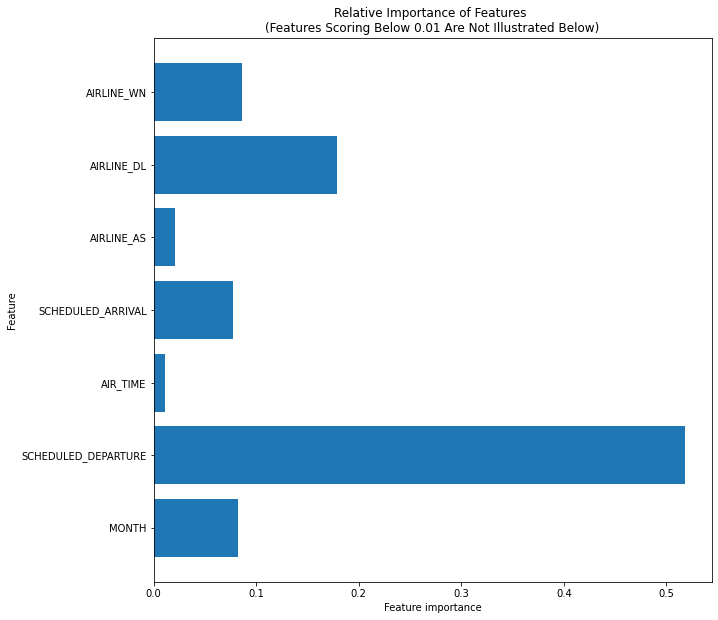

In [86]:
show_importances(X_train, tree_clf)

__Review:__ Somewhat intuitively, the scheduled departure window (which we had earlier grouped into three-hour blocks) was the most important feature.  There is likely some multicolinearity between scheduled departure and scheduled arrival. Some of the airlines and a few of the airports were also relatively important. 

### Visualize Relationship Between Scheduled Departure and Arrival Delay:

In [42]:
#Prepare visualizing delay by departure window
s1 = df6.groupby(['SCHEDULED_DEPARTURE'])['ARRIVAL_DELAY'].sum()
s2 = df6.groupby(['SCHEDULED_DEPARTURE'])['ARRIVAL_DELAY'].count()
df_sched_dept = pd.concat([s1, s2], axis = 1)
df_sched_dept.columns = ['Delays','Total']
df_sched_dept['pc_delayed'] = df_sched_dept.Delays / df_sched_dept.Total
df_sched_dept['pc_ontime'] = 1-df_sched_dept.pc_delayed
df_sched_dept.reset_index(inplace=True)

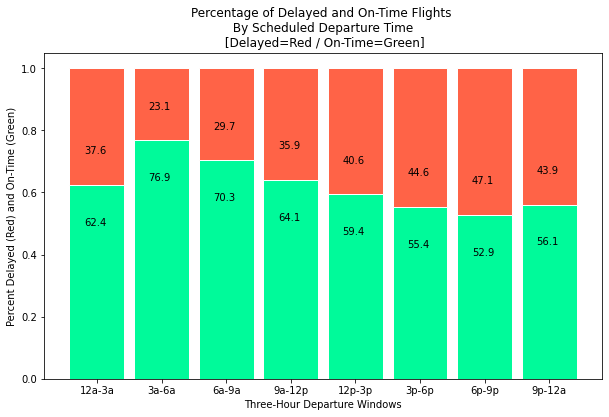

In [43]:
# Visualize On-Time Departures by the Departure Window
r = [0,1,2,3,4,5,6,7]
greenBars = df_sched_dept.pc_ontime
redBars = df_sched_dept.pc_delayed
barWidth = 0.85
names = ('12a-3a','3a-6a','6a-9a', '9a-12p', '12p-3p', '3p-6p', '6p-9p', '9p-12a')
# Create green Bars
plt.figure(figsize=(10,6))
plt.bar(r, greenBars, color='mediumspringgreen', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, redBars, bottom=greenBars, color='tomato', edgecolor='white', width=barWidth)
plt.xticks(r, names)
plt.ylabel("Percent Delayed (Red) and On-Time (Green)")
plt.xlabel("Three-Hour Departure Windows")
plt.title("Percentage of Delayed and On-Time Flights \n By Scheduled Departure Time \n [Delayed=Red / On-Time=Green]")

for i in range(len(r)):
  plt.annotate(round(df_sched_dept.pc_ontime[i]*100,1), xy=(r[i]-.2,(df_sched_dept.pc_ontime[i] - 0.13)))
  plt.annotate(round(df_sched_dept.pc_delayed[i]*100,1), xy=(r[i]-.2,(df_sched_dept.pc_ontime[i] + 0.1)))

plt.show()

__Review:__ On the decison tree list of feature importances, the scheduled departure time was by far the highest-scoring feature. The feature was broken down into three-hour windows. The increase in delays towards the end of the day makes some sense, easing in the later evening. 

### Visualize Relationship Between Airline and Arrival Delay:

In [44]:
#Prepare visualizing delay by departure window
s1 = df6.groupby(['AIRLINE'])['ARRIVAL_DELAY'].sum()
s2 = df6.groupby(['AIRLINE'])['ARRIVAL_DELAY'].count()
df_airlines = pd.concat([s1, s2], axis = 1)
df_airlines.columns = ['Delays','Total']
df_airlines['pc_delayed'] = df_airlines.Delays / df_airlines.Total
df_airlines['pc_ontime'] = 1-df_airlines.pc_delayed
airlines = ['American','Alaska','JetBlue','Delta', 'Atlantic Southeast', 'Frontier', 'Hawaiian', 'American Eagle', 
            'Spirit', 'Skywest', 'United','US','Virgin America', 'Southwest']
df_airlines['Airlines'] = airlines
a = []
b = []
for i in range(len(airlines)):
  a.append(round(df_airlines.pc_delayed[i]*100,1))
  b.append(round(df_airlines.pc_ontime[i]*100,1))
df_airlines['Ontime_Labels'] = b
df_airlines['Delay_Labels'] = a

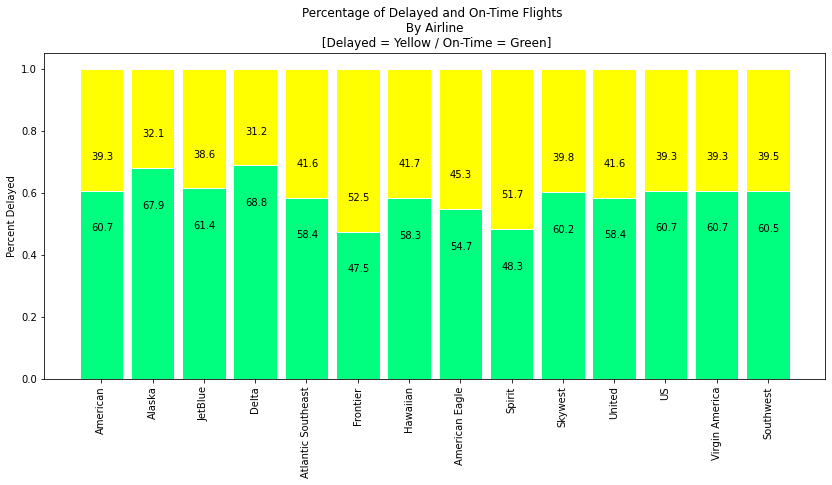

In [45]:
# Visualize On-Time Departures by the Departure Window
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
greenBars = df_airlines.pc_ontime
redBars = df_airlines.pc_delayed
barWidth = 0.85
names = df_airlines.Airlines
# Create green Bars
plt.figure(figsize=(14,6))
ax = plt.bar(r, greenBars, color='springgreen', edgecolor='white', width=barWidth)
# Create orange Bars
ax = plt.bar(r, redBars, bottom=greenBars, color='yellow', edgecolor='white', width=barWidth)
plt.xticks(r, names, rotation=90)
plt.ylabel("Percent Delayed")
plt.title("Percentage of Delayed and On-Time Flights \n By Airline \n [Delayed = Yellow / On-Time = Green]")

for i in range(len(df_airlines.Airlines)):
  plt.annotate(df_airlines.Ontime_Labels[i], xy=(r[i]-.2,(df_airlines.Ontime_Labels[i]/100) -0.13))
  plt.annotate(df_airlines.Delay_Labels[i], xy=(r[i]-.2, (df_airlines.Ontime_Labels[i]/100) + 0.1))

plt.show()

__Review:__ As noted above, Delta, Southwest, and Alaska Airlines were the only airline features showing up on the decision tree feature importances.  The above visualization shows that Delta has a better on-time record (using a zero-minutes-late threshold above), and Alaska is relatively close.  Curiously, Southwest appears rather average, though it has 22% of the total flights, more than all other airlines (counting partners like American and American Eagle separately).  This may help it appear more average. 

OVERALL, the model didn't perform too well.  We will implement a random forest to see if that improves performance. 

## __Random Forest Model__

In [46]:
forest = RandomForestClassifier(n_estimators=30, max_depth=10)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
forest_pred = forest.predict(X_test)

In [48]:
forest.score(X_train, y_train)

0.6092381765570893

In [49]:
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, forest_pred) * 100))

Testing Accuracy for Random Forest Classifier: 60.89%


__Review:__ The random forest classifier is actually marginally worse than the decision tree, at 60.89% accuracy.  We will tune the model to hopefully increase its accuracy.  First, though, I want to review the feature importances of the random forest, to see how they compare to the decision tree model:

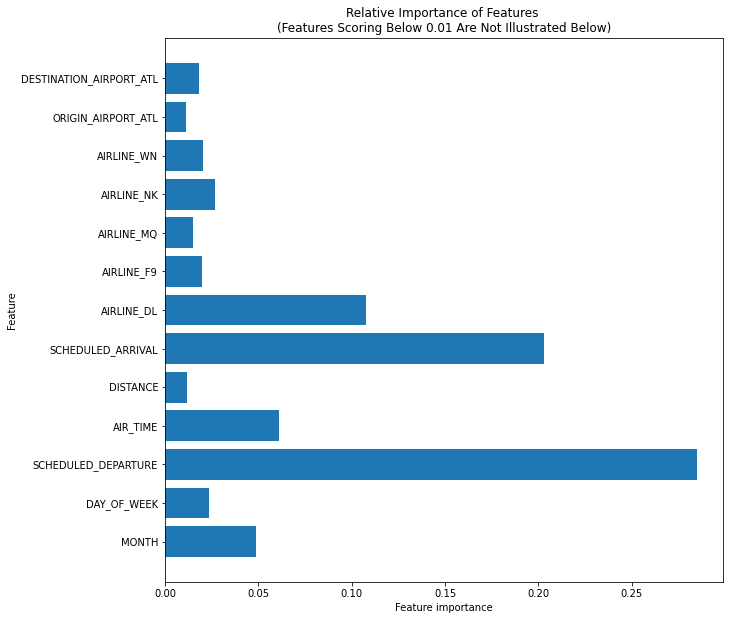

In [77]:
show_importances(X_train, forest)

__Review:__ Many more features were included in the importances in the random forest.  For readability, we implemented a feature-importance threhold of 0.01. 

Scheduled arrival time remained the most important feature; scheduled departure was also significant, but it's likely important for the same underlying reasons as the scheduled arrival time. 

Delta Airlines is also higher on the scale, likely due to its relative on-time performance, shown above. 

Finally, the month is a relatively important feature. The relationship between month of departure and on-time performance was not visualized above; we will do so below:



In [54]:
#Prepare visualizing delay by Month
s1 = df6.groupby(['MONTH'])['ARRIVAL_DELAY'].sum()
s2 = df6.groupby(['MONTH'])['ARRIVAL_DELAY'].count()
df_months = pd.concat([s1, s2], axis = 1)
df_months.columns = ['Delays','Total']
df_months['pc_delayed'] = df_months.Delays / df_months.Total
df_months['pc_ontime'] = 1-df_months.pc_delayed
df_months.reset_index(inplace=True)

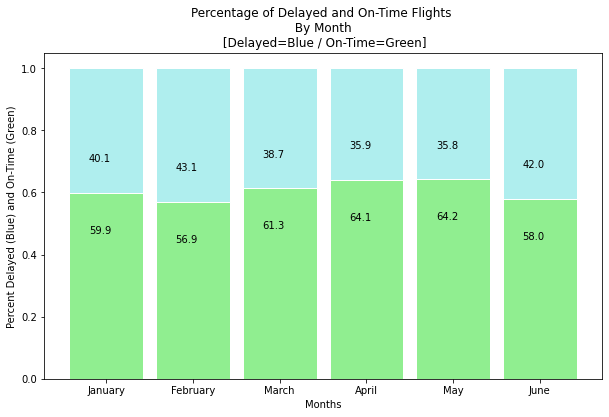

In [55]:
# Visualize On-Time Departures by Month
r = [0,1,2,3,4,5]
greenBars = df_months.pc_ontime
redBars = df_months.pc_delayed
barWidth = 0.85
names = ('January', 'February', 'March', 'April', 'May', 'June')
# Create green Bars
plt.figure(figsize=(10,6))
plt.bar(r, greenBars, color='lightgreen', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, redBars, bottom=greenBars, color='paleturquoise', edgecolor='white', width=barWidth)
plt.xticks(r, names)
plt.ylabel("Percent Delayed (Blue) and On-Time (Green)")
plt.xlabel("Months")
plt.title("Percentage of Delayed and On-Time Flights \n By Month \n [Delayed=Blue / On-Time=Green]")

for i in range(len(r)):
  plt.annotate(round(df_months.pc_ontime[i]*100,1), xy=(r[i]-.2,(df_months.pc_ontime[i] - 0.13)))
  plt.annotate(round(df_months.pc_delayed[i]*100,1), xy=(r[i]-.2,(df_months.pc_ontime[i] + 0.1)))

plt.show()

There doesn't appear to be a clear pattern of delays by month, though there definitely is an increase in March, April, and May. 

## Tuning the Models

First, we will attempt to tune the decision tree with GridSearchCV.  

While we would typically use GridSearchCV, the large number of features in this dataset would likely take an extreme amount of time.  Accordingly, we'll tune the model using RandomSearchCV. 

In [56]:
# Set parameter grid

clf = DecisionTreeClassifier()

params =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 50],
    'min_samples_split': [1, 10, 20]
}

gs_tree = GridSearchCV(clf, params, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 20}

The GridSeachCV returned the following: gini, max_depth=50, min_samples_split=20. We'll run the model on these parameters and see if performance improves: 

In [60]:
tree_clf_2 = DecisionTreeClassifier(max_depth = 50, criterion='gini', min_samples_split=20)
tree_clf_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
pred_2 = tree_clf_2.predict(X_test)

In [79]:
print("Previous train score was 61.25%; \nTesting Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_2) * 100))

Previous train score was 61.25%; 
Testing Accuracy for Decision Tree Classifier: 64.28%


__Review:__ The GridSearchCV improved the model's performance from 61.25% accuracy to 64.28% accuracy. However, the max_depth was the high end of the parameter grid.  So, we will re-run with a broader grid. The runtime was long (~90 minutes on ColabPro).  A RandomizedSearchCV also crashed ColabPro.  Considering that the parameters used were all the maxima of their respective parameters, I'll run one more decision tree with increased parameters to see if the accuracy changes at all. 

In [ ]:
# clf = DecisionTreeClassifier() -- CRASHED AFTER 2 HOURS

# params =  {
#     'criterion': ['gini'],
#     'max_depth': [10, 20, 50],
#     'min_samples_split': [30]
# }

# gs_tree_RSCV = RandomizedSearchCV(clf, params, cv=3)
# gs_tree_RSCV.fit(X_train, y_train)

# gs_tree_RSCV.best_params_

In [63]:
tree_clf_3 = DecisionTreeClassifier(max_depth = 75, criterion='gini', min_samples_split=50)
tree_clf_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=75, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
pred_3 = tree_clf_3.predict(X_test)

In [66]:
print("Previous train score was 65.05%; \nTesting Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_3) * 100))

Previous train score was 65.05%; 
Testing Accuracy for Decision Tree Classifier: 65.03%


__Review:__ Increasing the parameters did not improve the model; it actually very marginally decreased its performance. Accordingly, we'll review the feature importances based upon the GridSearchCV parameters (the second iteration of the model, tree_clf_2). 

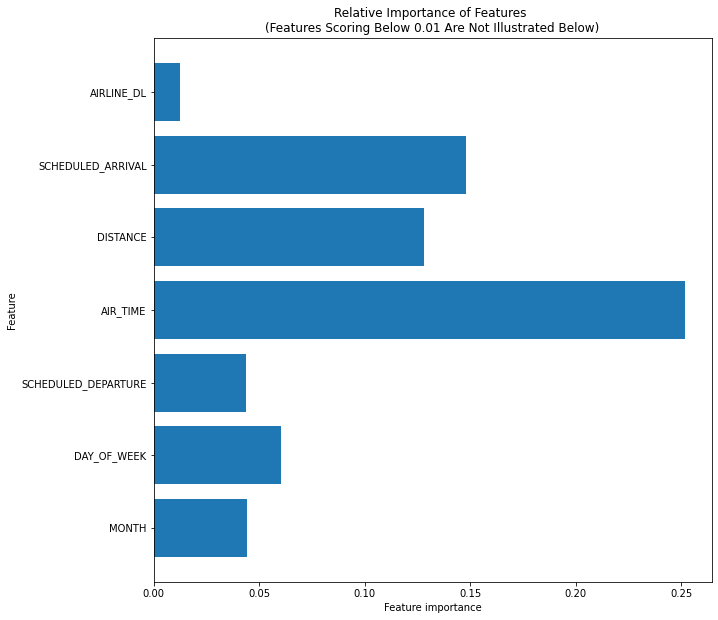

In [80]:
show_importances(X_train, tree_clf_2)

__Review:__ Interestingly, the Air_time feature gained significant importance in this iteration of the model.  This is a continuous variable, ranging from 7 to 690 minutes (see below).  To explore this relationship, we plotted the two columns from the original dataframe against each other: 

In [88]:
df6.AIR_TIME.describe()

count    2.810801e+06
mean     1.136824e+02
std      7.209756e+01
min      7.000000e+00
25%      6.100000e+01
50%      9.500000e+01
75%      1.440000e+02
max      6.900000e+02
Name: AIR_TIME, dtype: float64

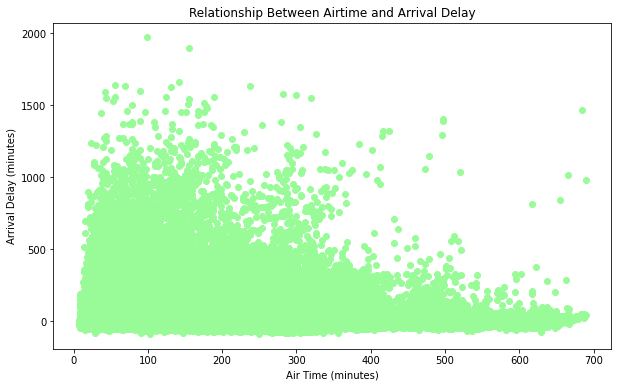

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(x=df2.AIR_TIME, y=df2.ARRIVAL_DELAY, color = 'palegreen')
plt.ylabel("Arrival Delay (minutes)")
plt.xlabel("Air Time (minutes)")
plt.title("Relationship Between Airtime and Arrival Delay")
plt.show()

__Review:__ There is a clear relationship showing that longer flights suffer much fewer delays than the shorter flights.  

## __Conclusion:__

Overall, we were not able to construct a model that could predict late flights with significant accuracy.  However, the various models identified features which were significant in determing whether a model would be effective.  For instance, longer flights have a significantly lower chance of being delayed than shorter flights; flights in April and May have a better on-time performance than other months (in our January-June review), and certain airlines simply performed better than others (Alaska and Delta performing better, while Frontier and Spirit performing worse). Finally, the departure window was also a significant feature in the models, and the data show that departures between 3am and 6am had the best on-time performance, while those departing between 6pm and 9pm had the worst. While purely measuring the chance that a flight would be delayed, these factors would be significant to consider. 

Future Work:  There is some class imbalance (shown below); we could re-run the model accounting for that imbalance, which may improve performance.  Also, we could further limit either airports and/or airlines to obtain better performance, though how we limit this may unfairly skew the model.  For instance, if smaller airports are a cause of the delays, removing smaller airports would bias the model.

We could also explore the reasons for the different delays (i.e., which months had more weather delays, which departure times had more airline delays, etc.).  

In [91]:
df6.ARRIVAL_DELAY.value_counts()

0.0    1710686
1.0    1100115
Name: ARRIVAL_DELAY, dtype: int64